In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\gowtham.l\AppData\Local\Temp\ipykernel_27088\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Loading Dataset

In [3]:
boston_df = pd.read_csv('HousingData.csv')

In [4]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Attribute Information (in order):\n",
######   - CRIM     per capita crime rate by town\n",
######       - INDUS    proportion of non-retail business acres per town\n",
######       - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n",
######       - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n",
######       - NOX      nitric oxides concentration (parts per 10 million)\n",
######       - RM       average number of rooms per dwelling\n",
######       - AGE      proportion of owner-occupied units built prior to 1940\n",
######       - DIS      weighted distances to five Boston employment centres\n",
######       - RAD      index of accessibility to radial highways\n",
######       - TAX      full-value property-tax rate per $10,000\n",
######       - PTRATIO  pupil-teacher ratio by town\n",
######       - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n",
######       - LSTAT    % lower status of the population\n",
######       - MEDV     Median value of owner-occupied homes in $1000's\n",

## Preparing the dataset

In [5]:
# Changing the MEDV column as price
boston_df.rename(columns={'MEDV':'Price'},inplace=True)
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
## Summarizing the stats
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
## Null values
boston_df.isnull().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

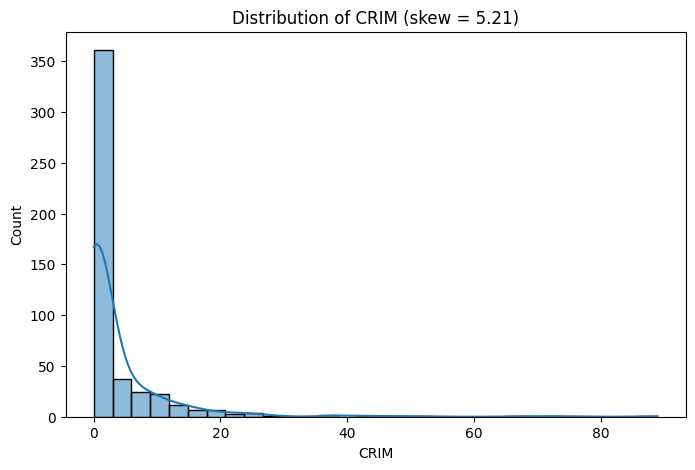

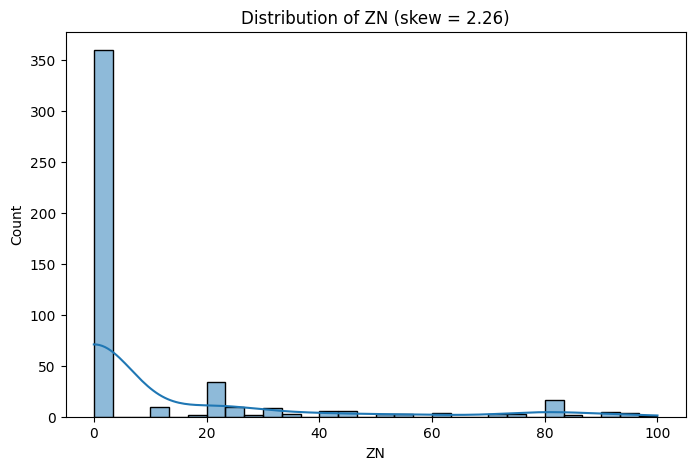

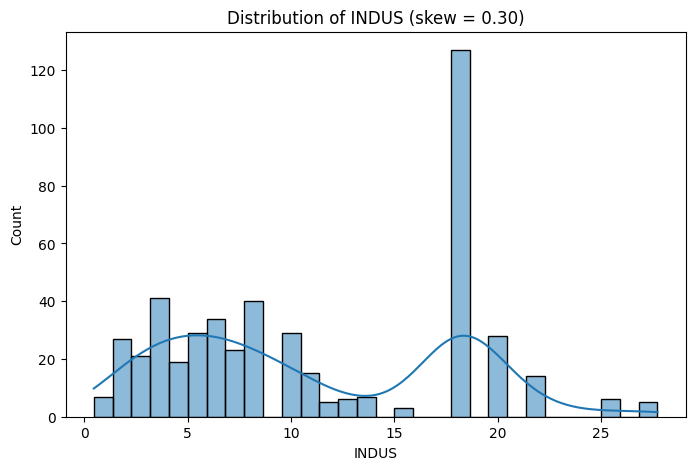

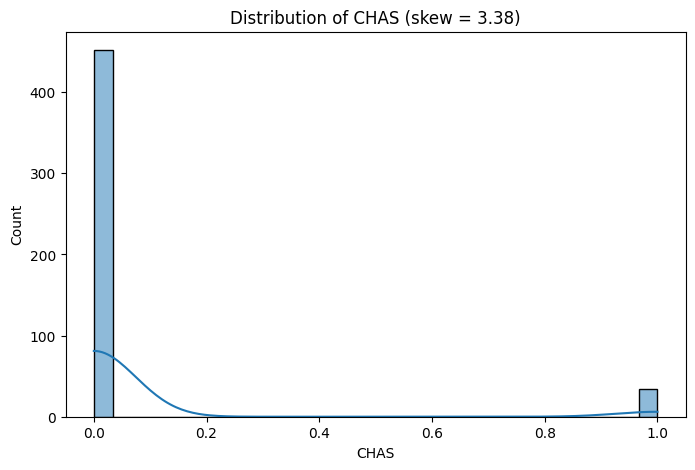

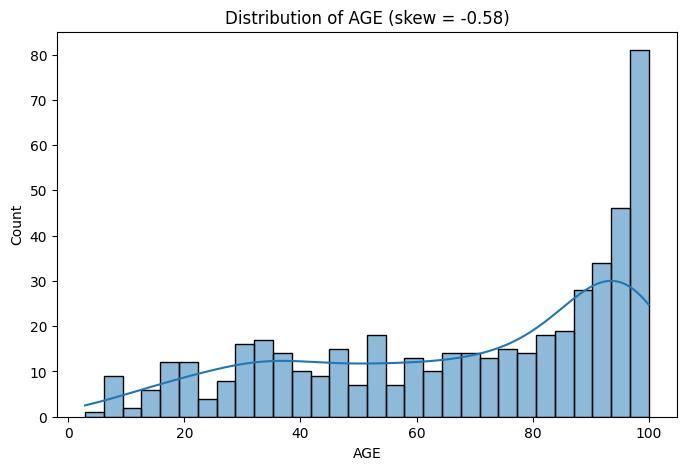

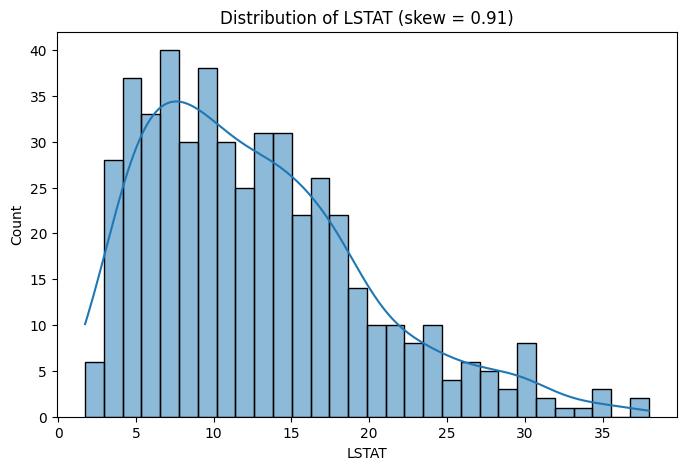

In [9]:
## Chceking all NULL columns Skew
col = ["CRIM","ZN","INDUS","CHAS","AGE","LSTAT"]  

for i in col:
     plt.figure(figsize=(8,5))
     sns.histplot(boston_df[i], kde=True, bins=30)
     plt.title(f"Distribution of {i} (skew = {boston_df[i].skew():.2f})")
     plt.show()


In [10]:
# Filling the null values

from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame

# Strategy dictionary
imputer_dict = {
    "CRIM": "median",
    "ZN": "median",
    "INDUS": "median",
    "CHAS": "most_frequent",
    "AGE": "median",
    "LSTAT": "median"
}

for col,strategy in imputer_dict.items():
    imputer = SimpleImputer(strategy=strategy)
    boston_df[[col]] = imputer.fit_transform(boston_df[[col]])

## Performing EDA

In [11]:
## Correlation value will be b/w -1 to 1
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.185359,0.392632,-0.055585,0.410971,-0.220045,0.343427,-0.366025,0.601224,0.560469,0.277964,-0.365336,0.437417,-0.383895
ZN,-0.185359,1.000000,-0.507304,-0.032992,-0.498619,0.312295,-0.535341,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.398838,0.362292
INDUS,0.392632,-0.507304,1.000000,0.054693,0.738387,-0.377978,0.614248,-0.698621,0.592735,0.716267,0.385366,-0.354840,0.564508,-0.476394
CHAS,-0.055585,-0.032992,0.054693,1.000000,0.070867,0.106797,0.074984,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.047279,0.183844
NOX,0.410971,-0.498619,0.738387,0.070867,1.000000,-0.302188,0.711864,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.573040,-0.427321
RM,-0.220045,0.312295,-0.377978,0.106797,-0.302188,1.000000,-0.239518,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.604323,0.695360
AGE,0.343427,-0.535341,0.614248,0.074984,0.711864,-0.239518,1.000000,-0.724354,0.447088,0.498408,0.261826,-0.268029,0.575022,-0.377572
DIS,-0.366025,0.632428,-0.698621,-0.092318,-0.769230,0.205246,-0.724354,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483244,0.249929
RAD,0.601224,-0.300061,0.592735,-0.003339,0.611441,-0.209847,0.447088,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.467765,-0.381626
TAX,0.560469,-0.304385,0.716267,-0.035822,0.668023,-0.292048,0.498408,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524156,-0.468536


In [12]:
# sns.pairplot(boston_df,kind='kde')

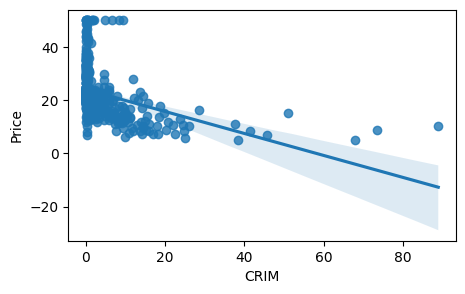

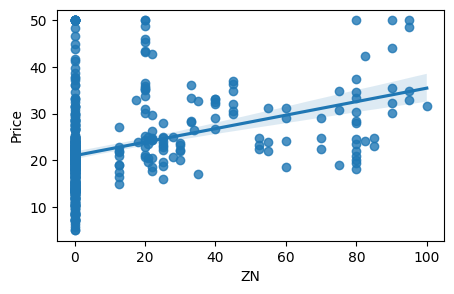

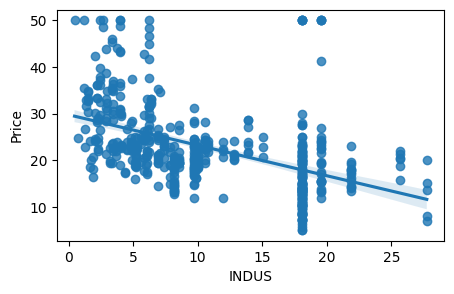

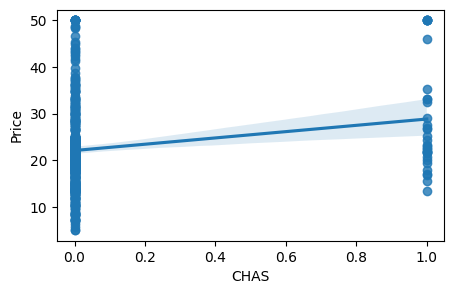

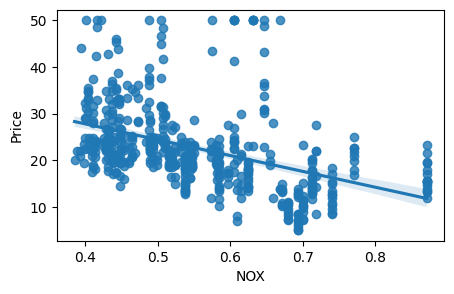

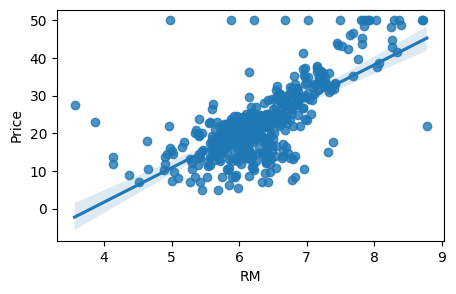

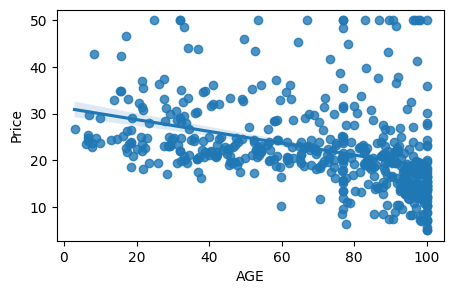

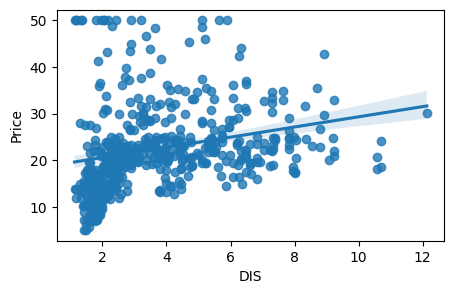

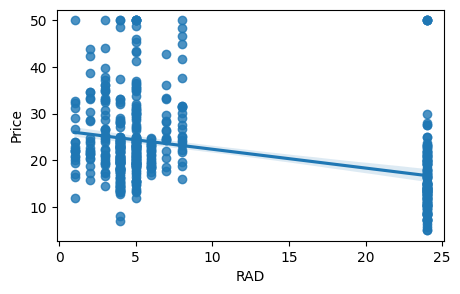

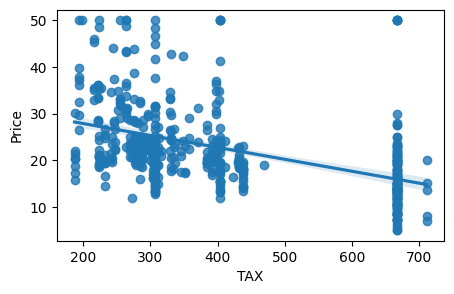

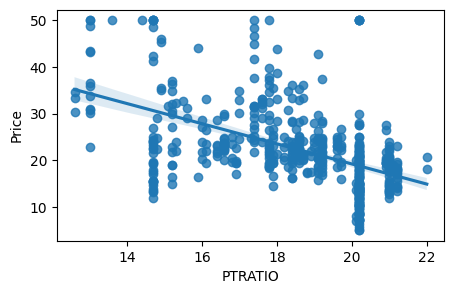

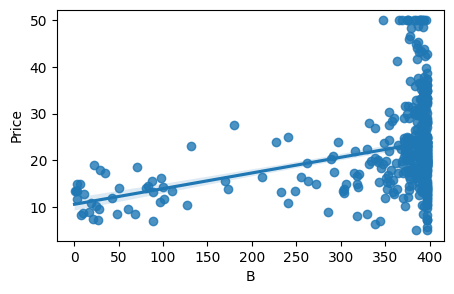

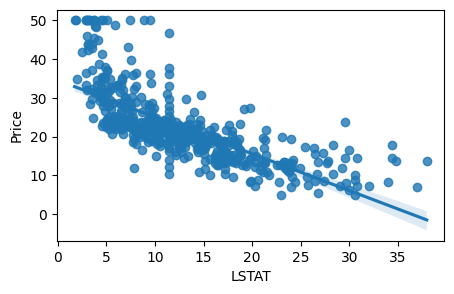

In [13]:
col=boston_df.columns
for i in col[:-1]:
    plt.figure(figsize=(5,3))
    sns.regplot(x=i,y="Price",data=boston_df)
    plt.show()
    

## AS RAD and TAX as good correlation we can remove one column.. in big data set

# Spliting data to X and Y

In [14]:
X= boston_df.iloc[:,:-1]
y= boston_df['Price']

In [15]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [16]:
# Spliting data for Train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train.shape,X_test.shape

((404, 13), (102, 13))

# Scaling the columns to be under one set

In [18]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
X_train=standardscaler.fit_transform(X_train)
X_test =standardscaler.transform(X_test)

In [20]:
import pickle
pickle.dump(standardscaler,open('scaling.pkl','wb'))

# Model training

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regression = LinearRegression()

In [24]:
regression.fit(X_train,y_train)

LinearRegression()

In [25]:
regression.coef_

array([-0.9934725 ,  0.64824488, -0.17191877,  0.83290764, -1.87839285,
        3.34243906, -0.49638185, -3.20611875,  1.87210088, -1.50273794,
       -1.98110867,  1.10044995, -3.0909313 ])

In [26]:
regression.intercept_

22.796534653465347

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
Train_pred = regression.predict(X_train)
r2_score(y_train,Train_pred)

0.742578124156171

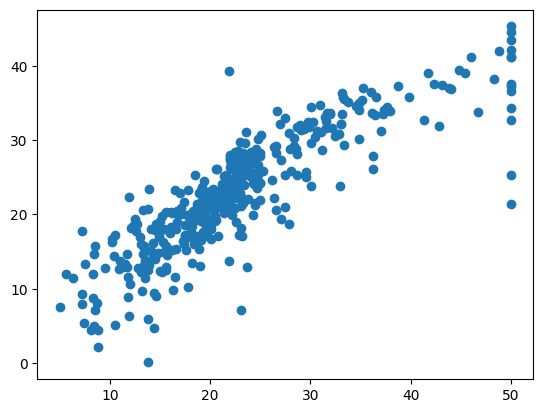

In [28]:
plt.scatter(y_train,Train_pred)

0.6591013893903512


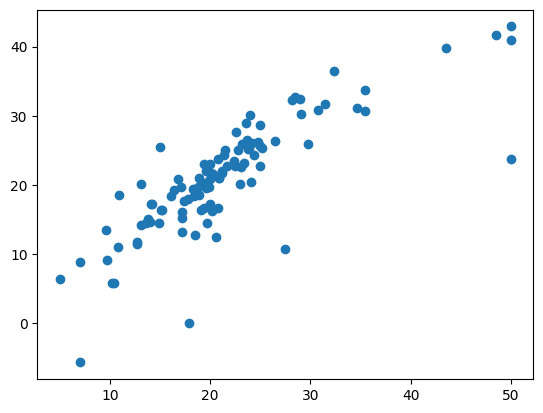

In [29]:
test_pred = regression.predict(X_test)
print(r2_score(y_test,test_pred))
plt.scatter(y_test,test_pred)

In [ ]:
from sklearn.linear_model import Ridge, Lasso


# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Lasso
lasso = Lasso(alpha=0.01)  # smaller alpha for Lasso usually
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Evaluate
print("Ridge R2:", r2_score(y_test, ridge_pred))
print("Lasso R2:", r2_score(y_test, lasso_pred))


Ridge R2: 0.6590559449083203
Lasso R2: 0.6585347014082956


In [31]:
print("Linear MSE:", mean_squared_error(y_test, test_pred))
print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))
print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))

Linear MSE: 24.999384790103356
Ridge MSE: 25.002717405894444
Lasso MSE: 25.040942163698983


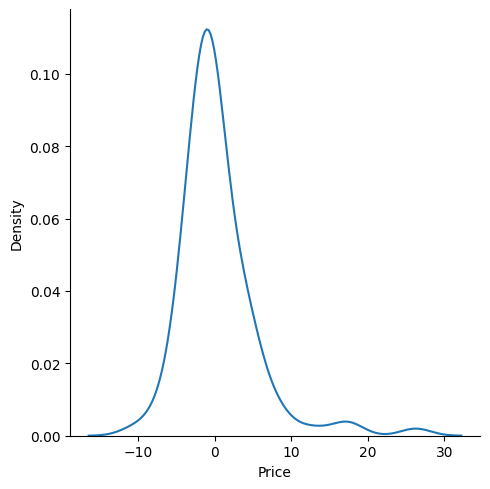

In [32]:
resdiual = y_test - test_pred
sns.displot(resdiual,kind="kde")

## Assumptions

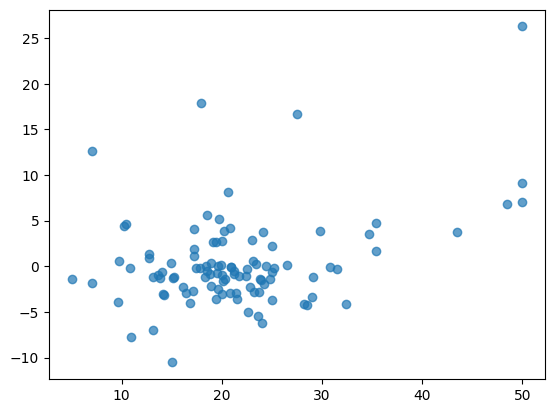

In [33]:
plt.scatter(y_test,resdiual,alpha=0.7)

# adjusted R square
### 1 - [(1-R-squared) * (n - 1) / (n - k - 1)]

In [34]:
LR_r2_score = r2_score(y_test,test_pred)
1-(1-LR_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6087413673684713

In [35]:
lasso_r2_score = r2_score(y_test,lasso_pred)
1-(1-lasso_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6080909641163392

In [36]:
ridge_r2_score = r2_score(y_test,ridge_pred)
1-(1-ridge_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6086892094970495

## Prediction

In [79]:
newtestpoint=boston_df.iloc[0:1,:-1]
newtestpoint

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98


In [80]:
regression.predict(standardscaler.transform(newtestpoint))

array([30.17251216])

## Pickling the model file for deplyment

In [82]:
import pickle

In [85]:
pickle.dump(regression,open('regressionModel.pkl','wb'))

In [86]:
pb=pickle.load(open('regressionModel.pkl','rb'))

In [88]:
pb.predict(standardscaler.transform(newtestpoint))

array([30.17251216])